In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import sklearn
import glob
import pickle
import time
#from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix
from sklearn.utils import shuffle
%matplotlib inline

In [ ]:
path = '/home/saad/mine detector/test data' # use your path
all_files = glob.glob(path + "/*.csv")

# 16408
# 53846
count=0
air_p=[]
air_n=[]
stone_p=[]
stone_n=[]
fs_p=[]
fs_n=[]
heavy_p=[]
heavy_n=[]
coin_p=[]
coin_n=[]
mine_p=[]
mine_n=[]
pin_p=[]
pin_n=[]

for i in all_files:
    print(i)
    if 'air' in i[-30:].split('/')[-1]:
        air=pd.read_csv(i)
        air_p.append(air.iloc[:,0])
        air_n.append(air.iloc[:,1])
    if 'coin' in i[-30:].split('/')[-1]:
        coin=pd.read_csv(i)
        coin_p.append(coin.iloc[:,0])
        coin_n.append(coin.iloc[:,1])

    if 'fibersheet' in i[-30:].split('/')[-1]:
        fs=pd.read_csv(i)
        fs_p.append(fs.iloc[:,0])
        fs_n.append(fs.iloc[:,1])
    if 'heavy' in i[-30:].split('/')[-1]:
        h=pd.read_csv(i)
        heavy_p.append(h.iloc[:,0])
        heavy_n.append(h.iloc[:,1])
    if 'mine' in i[-30:].split('/')[-1]:
        m=pd.read_csv(i)
        mine_p.append(m.iloc[:,0])
        mine_n.append(m.iloc[:,1])
       
    if 'pin' in i[-30:].split('/')[-1]:
        p=pd.read_csv(i)
        pin_p.append(p.iloc[:,0])
        pin_n.append(p.iloc[:,1])
        
    if 'stone' in i[-30:].split('/')[-1]:
        s=pd.read_csv(i)
        stone_p.append(s.iloc[:,0])
        stone_n.append(s.iloc[:,1])
    
air_p=np.array(air_p).flatten()
coin_p=np.array(coin_p).flatten()
mine_p=np.array(mine_p).flatten()
fs_p=np.array(fs_p).flatten()
stone_p=np.array(stone_p).flatten()
pin_p=np.array(pin_p).flatten()
heavy_p=np.array(heavy_p).flatten()
air_n=np.array(air_n).flatten()
coin_n=np.array(coin_n).flatten()
mine_n=np.array(mine_n).flatten()
fs_n=np.array(fs_n).flatten()
stone_n=np.array(stone_n).flatten()
pin_n=np.array(pin_n).flatten()
heavy_n=np.array(heavy_n).flatten()

In [16]:
df=pd.DataFrame(({'1':stone_p, '2':stone_n})).to_csv('/home/saad/latest 5.2 data/testing_data/stone.csv')
df=pd.DataFrame(({'1':mine_p, '2':mine_n})).to_csv('/home/saad/latest 5.2 data/testing_data/mine.csv')
df=pd.DataFrame(({'1':pin_p, '2':pin_n})).to_csv('/home/saad/latest 5.2 data/testing_data/pin.csv')
df=pd.DataFrame(({'1':coin_p, '2':coin_n})).to_csv('/home/saad/latest 5.2 data/testing_data/coin.csv')
df=pd.DataFrame(({'1':air_p, '2':air_n})).to_csv('/home/saad/latest 5.2 data/testing_data/air.csv')
df=pd.DataFrame(({'1':fs_p, '2':fs_n})).to_csv('/home/saad/latest 5.2 data/testing_data/fibersheet.csv')


In [17]:
df=pd.DataFrame(({'1':stone_p, '2':stone_n}))
df

,1,2
0,33669,33476
1,33624,33470
2,33673,33522
3,33621,33431
4,33353,33461
...,...,...
799987,33687,33487
799988,33747,33279
799989,33717,33332
799990,33669,33802


In [18]:
path = '/home/saad/latest 5.2 data/testing_data' # use your path
all_files = glob.glob(path + "/*.csv")

count=0
for i in all_files:
    print(i)
    data=pd.read_csv(i)
    list_cord=list(data.loc[:,'1'])
#     list_cord=list_cord[200:]
    diff=[]
    peak=[]
    peak1=[]
    peak2=[]
    peak3=[]
    peak4=[]
    l_50=[]
    collect={}
    i=35
    
    w=0
    while i <len(list_cord):
        if list_cord[i]>55000:
            peak=list_cord[i-35:i+120]
#             peak1=list_cord[i-37:i+167]
#             peak2=list_cord[i-35:i+173]
#             peak3=list_cord[i-30:i+178]
#             peak4=list_cord[i-25:i+162]
            w=w+1
            #print(w)
            if len(peak)<155:
                d=155-len(peak)
                                
                for f in range(0,d):
                    peak.append(peak[-1:][0])
                    
#             if len(peak1)<210:
#                 d=210-len(peak1)
                               
#                 for f in range(0,d):
#                     peak1.append(33803)
                    
#             if len(peak2)<210:
#                 d=210-len(peak2)
                               
#                 for f in range(0,d):
#                     peak2.append(33803)
                    
#             if len(peak3)<210:
#                 d=210-len(peak3)
                                
#                 for f in range(0,d):
#                     peak3.append(33803)
#             if len(peak4)<210 or len(peak):
#                 d=210-len(peak4)
           
#                 for f in range(0,d):
#                     peak4.append(33803) 
            #print(len(peak),len(peak1),len(peak2),len(peak3),len(peak4))
            collect[w]=peak
#             collect[w+1]=peak1
#             collect[w+2]=peak2
#             collect[w+3]=peak3
#             collect[w+4]=peak4
            i=i+165
        i=i+1
    dump=pd.DataFrame(collect)
    dump=dump.iloc[:,dump.columns!=0]
    file_n=all_files[count][-30:].split('/')[-1]
    print(dump.shape)
    pd.DataFrame(collect).to_csv('/home/saad/latest 5.2 data/testing_data/positives/'+file_n,header=False)
    count=count+1

/home/saad/latest 5.2 data/testing_data/pin.csv
(155, 3678)
/home/saad/latest 5.2 data/testing_data/air.csv
(155, 3999)
/home/saad/latest 5.2 data/testing_data/fibersheet.csv
(155, 4000)
/home/saad/latest 5.2 data/testing_data/stone.csv
(155, 4000)
/home/saad/latest 5.2 data/testing_data/mine.csv
(155, 3000)
/home/saad/latest 5.2 data/testing_data/coin.csv
(155, 4000)


In [19]:
# df=pd.read_csv('/home/saad/MMD data/testingdata/negatives/mine.csv')

In [20]:
path = '/home/saad/latest 5.2 data/testing_data/' # use your path
all_files = glob.glob(path + "/*.csv")

count=0
for i in all_files:
    print(i)
    data=pd.read_csv(i)
    list_cord=list(data.loc[:,'2'])
#     list_cord=list_cord[200:]
    diff=[]
    peak=[]
    peak1=[]
    peak2=[]
    peak3=[]
    peak4=[]
    l_50=[]
    collect={}
    i=50
    
    w=0
    while i <len(list_cord):
        if list_cord[i]>55000:
            peak=list_cord[i-50:i+90]
#             peak1=list_cord[i-37:i+167]
#             peak2=list_cord[i-35:i+173]
#             peak3=list_cord[i-30:i+178]
#             peak4=list_cord[i-25:i+162]
            w=w+1
            #print(w)
            if len(peak)<140:
                d=140-len(peak)
                                
                for f in range(0,d):
                    peak.append(peak[-1:][0])
                    
#             if len(peak1)<210:
#                 d=210-len(peak1)
                               
#                 for f in range(0,d):
#                     peak1.append(33803)
                    
#             if len(peak2)<210:
#                 d=210-len(peak2)
                               
#                 for f in range(0,d):
#                     peak2.append(33803)
                    
#             if len(peak3)<210:
#                 d=210-len(peak3)
                                
#                 for f in range(0,d):
#                     peak3.append(33803)
#             if len(peak4)<210 or len(peak):
#                 d=210-len(peak4)
           
#                 for f in range(0,d):
#                     peak4.append(33803) 
            #print(len(peak))
            collect[w]=peak
#             collect[w+1]=peak1
#             collect[w+2]=peak2
#             collect[w+3]=peak3
#             collect[w+4]=peak4
            i=i+135
        i=i+1
    dump=pd.DataFrame(collect)
    print(dump.shape)
    dump=dump.iloc[:,dump.columns!=0]
    file_n=all_files[count][-30:].split('/')[-1]
    #print(file_n)
    pd.DataFrame(collect).to_csv('/home/saad/latest 5.2 data/testing_data/negatives/'+file_n,header=False)
    count=count+1

/home/saad/latest 5.2 data/testing_data/pin.csv
(140, 4000)
/home/saad/latest 5.2 data/testing_data/air.csv
(140, 4000)
/home/saad/latest 5.2 data/testing_data/fibersheet.csv
(140, 4000)
/home/saad/latest 5.2 data/testing_data/stone.csv
(140, 4000)
/home/saad/latest 5.2 data/testing_data/mine.csv
(140, 3000)
/home/saad/latest 5.2 data/testing_data/coin.csv
(140, 4000)


In [2]:
classes=np.array(['air','mine','coin','pin','stone','fibersheet'])


In [3]:
path_p = '/home/saad/latest 5.2 data/testing_data/positives/' # use your path
all_files_p = glob.glob(path_p + "/*.csv")
path_n = '/home/saad/latest 5.2 data/testing_data/negatives/' # use your path
all_files_n = glob.glob(path_n + "/*.csv")
# path_mn = '/home/saad/MMD data/cleaned/metal/negatives' # use your path
# all_files_mn = glob.glob(path_mn + "/*.csv")
# path_nn = '/home/saad/MMD data/cleaned/non-metal/negatives' # use your path
# all_files_nn = glob.glob(path_nn + "/*.csv")
df_p=[]
df_n=[]
# df_mn=[]
# df_nn=[]
positive_metal={}
negative_metal={}
positive_non={}
negative_non={}
count=0
for i,j in zip(all_files_p,all_files_n):
    print(i,j)
    s1=str(all_files_p[count][-30:].split('/')[-1])
    s2=str(all_files_n[count][-30:].split('/')[-1])
    print(s1,s2)
    c1=[x for x in classes if s1.split('.')[0] in x][0]
    c2=[x for x in classes if s2.split('.')[0] in x][0]
    print(c1,c2)
    pos=pd.read_csv(i)
    neg=pd.read_csv(j)
    print(pos.shape,neg.shape)
    pos=pos.drop(columns=[pos.columns[0]],axis=1).transpose()
    neg=neg.drop(columns=[neg.columns[0]],axis=1).transpose()
    p=[]
    n=[]

    for a in range(0,pos.shape[0]):
        p.append(c1)
    for a in range(0,neg.shape[0]):
        n.append(c2)
    pos['Material']=p
    neg['Material']=n
    df_p.append(pos)
    df_n.append(neg)
    count=count+1

data_p=pd.concat(df_p, axis=0, ignore_index=True)
data_n=pd.concat(df_n,axis=0,ignore_index=True)
data_p=shuffle(data_p)
data_n=shuffle(data_n)
print(data_p.shape)
print(data_n.shape)

/home/saad/latest 5.2 data/testing_data/positives/pin.csv /home/saad/latest 5.2 data/testing_data/negatives/pin.csv
pin.csv pin.csv
pin pin
(154, 3679) (139, 4001)
/home/saad/latest 5.2 data/testing_data/positives/air.csv /home/saad/latest 5.2 data/testing_data/negatives/air.csv
air.csv air.csv
air air
(154, 4000) (139, 4001)
/home/saad/latest 5.2 data/testing_data/positives/fibersheet.csv /home/saad/latest 5.2 data/testing_data/negatives/fibersheet.csv
fibersheet.csv fibersheet.csv
fibersheet fibersheet
(154, 4001) (139, 4001)
/home/saad/latest 5.2 data/testing_data/positives/stone.csv /home/saad/latest 5.2 data/testing_data/negatives/stone.csv
stone.csv stone.csv
stone stone
(154, 4001) (139, 4001)
/home/saad/latest 5.2 data/testing_data/positives/mine.csv /home/saad/latest 5.2 data/testing_data/negatives/mine.csv
mine.csv mine.csv
mine mine
(154, 3001) (139, 3001)
/home/saad/latest 5.2 data/testing_data/positives/coin.csv /home/saad/latest 5.2 data/testing_data/negatives/coin.csv
co

In [4]:
Xp=data_p.iloc[:,0:-1]
yp=data_p.iloc[:,-1]
Xn=data_n.iloc[:,0:-1]
yn=data_n.iloc[:,-1]

In [102]:
Xn1=Xn.iloc[1:2000,:]

In [106]:
noise=np.random.normal(0,1,(1999,139))

In [107]:
Xn2=np.array(Xn1)+noise

In [113]:
Xn2=pd.DataFrame(Xn2)

In [30]:
Xn.iloc[7,:].plot()

<AxesSubplot:>

In [32]:
yp.shape

(22677,)

In [47]:
# i=0.7
# data_x=[]
# data_y=[]
# while i < 1.31:
#     Xn=Xn1_train*i
#     data_x.append(Xn1)
#     data_y.append(yn_train)
#     i=i+0.01


In [48]:
#Xn[~Xn.isin(Xn1)].dropna()

In [34]:
# Xp=Xp.apply(pd.to_numeric,downcast='float')
# Xn=Xn.apply(pd.to_numeric,downcast='float')


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
import glob
#from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix
from utils.utils import generate_results_csv
from utils.utils import create_directory
from utils.utils import read_dataset
from utils.utils import transform_mts_to_ucr_format
from utils.utils import visualize_filter
from utils.utils import viz_for_survey_paper
from utils.utils import viz_cam
import os
import numpy as np
import sys
import sklearn
import utils
from utils.constants import CLASSIFIERS
from utils.constants import ARCHIVE_NAMES
from utils.constants import ITERATIONS

2021-09-29 10:34:19.349692: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [6]:
nb_classes =6

x_test=np.array(Xp).astype('float')
y_test=np.array(yp)
# transform the labels from integers to one hot vectors
enc = sklearn.preprocessing.OneHotEncoder(categories='auto')
enc.fit(np.concatenate((y_test, y_test), axis=0).reshape(-1, 1))
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()

# save orignal y because later we will use binary
y_true = np.argmax(y_test, axis=1)

if len(x_test.shape) == 2:  # if univariate
    # add a dimension to make it multivariate with one dimension 
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [7]:
from classifiers import resnet
path_p='/home/saad/aug_positive/'
input_shape = x_test.shape[1:]
classifier_p=resnet.Classifier_RESNET(path_p, input_shape, nb_classes, verbose=True,build=False,load_weights=False)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3', '/job:localhost/replica:0/task:0/device:GPU:4', '/job:localhost/replica:0/task:0/device:GPU:5', '/job:localhost/replica:0/task:0/device:GPU:6', '/job:localhost/replica:0/task:0/device:GPU:7', '/job:localhost/replica:0/task:0/device:GPU:8', '/job:localhost/replica:0/task:0/device:GPU:9')
Number of devices: 10


2021-09-29 10:34:22.138153: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-29 10:34:22.139361: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-29 10:34:22.520207: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:1a:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-09-29 10:34:22.521529: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:1b:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-09-29 10:34:22.522845: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 2 with properties: 
pciBusID: 0000:1c:0

In [8]:
matrixx,yp_pred,yp_pred1 = classifier_p.predict1(x_test, y_true,return_df_metrics=True)

2021-09-29 10:34:28.517767: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-29 10:34:28.539992: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2100000000 Hz
2021-09-29 10:34:28.779147: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-09-29 10:34:28.984279: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2021-09-29 10:34:29.990973: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2021-09-29 10:34:30.108778: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(yp)
inverted = label_encoder.inverse_transform(yp_pred)
model_results1=inverted

In [10]:
# model_results1=[]
# for i in model_results:
#     if i==0:
#         model_results1.append('air')
#     if i==1:
#         model_results1.append('coin')
#     if i==2:
#         model_results1.append('fibersheet')
#     if i==3:
#         model_results1.append('mine')
#     if i==4:
#         model_results1.append('pin')
#     if i==5:
#         model_results1.append('stone')    

In [11]:
len(model_results1)

22677

In [40]:
cm=confusion_matrix(yp, model_results1)

In [13]:
total_tn=[]
total_tp=[]
total_fn=[]
total_fp=[]
dictt={}
sensitivity={}
specificity={}
accuracy={}
yp=np.array(yp)
model_results1=np.array(model_results1)
for i in classes:
    if len(confusion_matrix(np.array(yp)==i, np.array(model_results1)==i)) == 2:
        tn, fp, fn, tp = confusion_matrix(yp==i, model_results1==i).ravel()
        print(tp)
        total_tp.append(tp)
        total_fn.append(fn)
        total_fp.append(fp)
        total_tn.append(tn)
#         print(tp)
        sensitivity[i]=(tp)/((tp)+(fn))
        specificity[i]=(tn)/((tn)+(fp))
        accuracy[i]=((tp) + (tn))/ ((tn)+ (tp)+(fp)+(fn))
    else:
        pass

2469
2474
4000
3672
3448
2364


In [14]:
accuracy

{'air': 0.9106583763284385,
 'mine': 0.9382193411826961,
 'coin': 0.9999118049124663,
 'pin': 0.9996472196498655,
 'stone': 0.8673104908056621,
 'fibersheet': 0.9094236451029678}

In [15]:
sensitivity

{'air': 0.6174043510877719,
 'mine': 0.8246666666666667,
 'coin': 1.0,
 'pin': 0.99836867862969,
 'stone': 0.862,
 'fibersheet': 0.591}

In [16]:
specificity

{'air': 0.9734446942927508,
 'mine': 0.9555318392031306,
 'coin': 0.9998929164212668,
 'pin': 0.9998947313016474,
 'stone': 0.8684478235262623,
 'fibersheet': 0.9776195320447609}

In [17]:
plt.rcParams['figure.figsize'] = [10, 10]

In [19]:
Xp

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
14028,33761,34056,34189,34106,34052,33963,33809,33711,33664,33540,...,34023,34303,34470,34498,34342,34294,34192,34035,33987,33874
17429,33650,33689,33651,33677,33609,33623,33675,33558,33343,33525,...,33430,33385,33321,33327,33482,33584,33663,33891,33912,33711
13188,33677,49165,49218,49480,49616,49538,49529,50109,50669,51045,...,34052,33945,33882,33736,33727,33729,33654,33705,33721,33682
12085,34120,33993,33967,33865,33703,33717,33637,50049,50279,50451,...,34554,34408,34292,34212,34023,33902,33844,33676,33661,33687
19612,32056,31820,31869,32323,32520,32650,32663,32545,32494,32394,...,31414,31541,31381,31438,31974,32194,32320,32255,32183,32131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,49152,48884,49152,49740,50214,50533,50816,50943,51181,51382,...,31648,31611,31657,31771,31702,31788,31843,31804,31848,31901
18093,33414,33321,33831,34108,34145,34159,34109,33964,33913,33814,...,33826,33644,33795,34303,34495,34481,34473,34334,34191,34136
6708,33604,33597,49273,49445,49636,49722,49929,50003,49933,49990,...,33987,33893,33862,33730,33723,33736,33656,33696,33729,33667
7817,48946,48763,49289,49808,50256,50585,50743,50953,51180,51305,...,33608,33649,33617,33700,33728,33705,33818,33812,33732,33831


In [20]:
nb_classes =6

x_test=np.array(Xn).astype('float')
y_test=np.array(yn)
# transform the labels from integers to one hot vectors
enc = sklearn.preprocessing.OneHotEncoder(categories='auto')
enc.fit(np.concatenate((y_test, y_test), axis=0).reshape(-1, 1))
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()

# save orignal y because later we will use binary
y_true = np.argmax(y_test, axis=1)

if len(x_test.shape) == 2:  # if univariate
    # add a dimension to make it multivariate with one dimension 
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [21]:
from classifiers import resnet
path_p='/home/saad/aug_negative/'
input_shape = x_test.shape[1:]
classifier_n=resnet.Classifier_RESNET(path_p, input_shape, nb_classes, verbose=True,build=False)

In [31]:
matrixx,yn_pred,yn_pred1 = classifier_n.predict1(x_test, y_true,return_df_metrics=True)
print(matrixx)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(yn)
inverted = label_encoder.inverse_transform(yn_pred)
model_results2=inverted

   precision  accuracy    recall  duration
0   0.831583  0.829348  0.831056       0.0


In [32]:
total_tn=[]
total_tp=[]
total_fn=[]
total_fp=[]
dictt={}
sensitivity1={}
specificity1={}
accuracy1={}
yn=np.array(yn)
model_results2=np.array(model_results2)
for i in classes:
    if len(confusion_matrix(yn==i, model_results2==i)) == 2:
        tn, fp, fn, tp = confusion_matrix(yn==i, model_results2==i).ravel()
        print(tp)
        total_tp.append(tp)
        total_fn.append(fn)
        total_fp.append(fp)
        total_tn.append(tn)
        sensitivity1[i]=(tp)/((tp)+(fn))
        specificity1[i]=(tn)/((tn)+(fp))
        accuracy1[i]=((tp) + (tn))/ ((tn)+ (tp)+(fp)+(fn))

2732
2611
3999
3991
2570
3172


In [33]:
accuracy1

{'air': 0.8886086956521739,
 'mine': 0.950391304347826,
 'coin': 0.9999565217391304,
 'pin': 0.9996086956521739,
 'stone': 0.8686086956521739,
 'fibersheet': 0.9515217391304348}

In [34]:
sensitivity1

{'air': 0.683,
 'mine': 0.8703333333333333,
 'coin': 0.99975,
 'pin': 0.99775,
 'stone': 0.6425,
 'fibersheet': 0.793}

In [35]:
specificity1

{'air': 0.9318947368421052,
 'mine': 0.9624,
 'coin': 1.0,
 'pin': 1.0,
 'stone': 0.9162105263157895,
 'fibersheet': 0.9848947368421053}

In [36]:
cm1=confusion_matrix(yn, model_results2)

In [44]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    %matplotlib inline
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


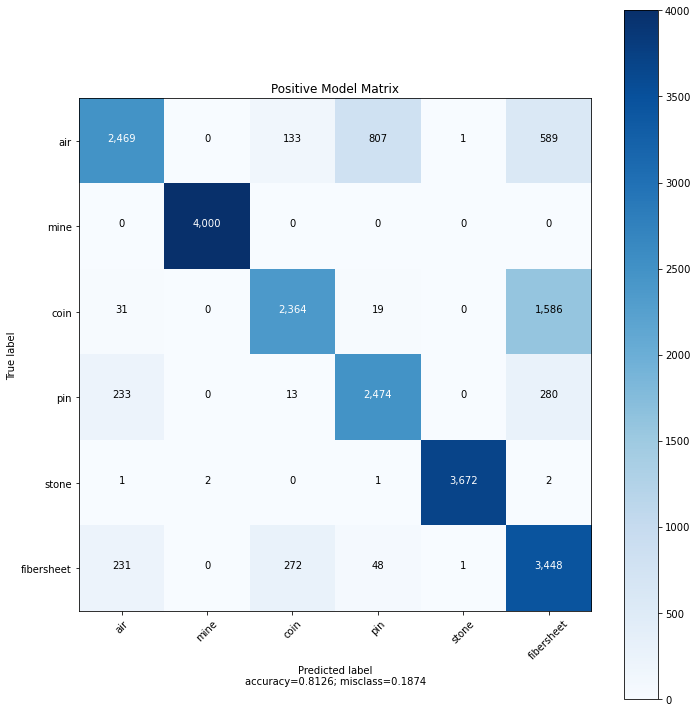

In [45]:
plot_confusion_matrix(cm,classes,title='Positive Model Matrix',normalize=False)

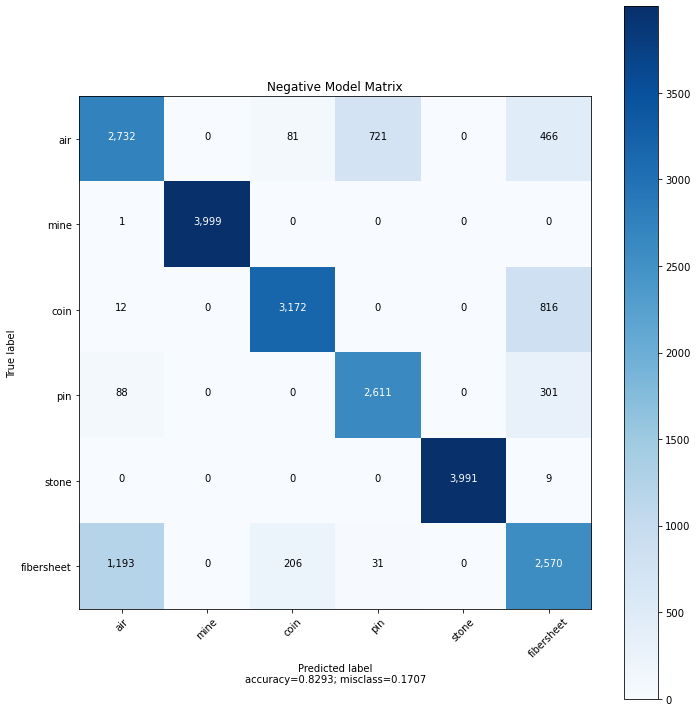

In [46]:
plot_confusion_matrix(cm1,classes,title='Negative Model Matrix',normalize=False)